In [31]:
import pydicom
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import os
import natsort
import dicom_functions
import explore_dicom_data

In [23]:
# Open the image files. 

#dataDir = r'C:\DICOM_data\Select NCITA coding task images'
rootDir = r'C:\DICOM_data\Softneta data\2015-04-30 Neuro'

#img1_name = 'slice_12_rot15deg_flipLR_flipUD.tif'
#img2_name = 'slice_12.tif'

#img1_colour = cv2.imread(os.path.join(rootDir, img1_name))  # Image to be aligned. 
#img2_colour = cv2.imread(os.path.join(rootDir, img2_name))  # Reference image. 

data = explore_dicom_data.load_dicom(dataDir)

np.shape(data)

(264,)

In [34]:
# Get 

Nfiles = 0

# Create a dictionary to store the dicom file names with unique keys for each unique base directory:
dicomDict = {}

for root, dirs, files in os.walk(rootDir):
    
    
    #print('root:\n\n', root, '\n')
    #print('dirs:\n\n', dirs, '\n')
    #print('files:\n\n', files, '\n')
    
    ## If in base directory containing files, i.e.
    #if len(files)>0:
    #    dir_basename = os.path.basename(root) # get the dir basename
    #    
    #    dicomDict.update({dir_basename:{'fpaths':fpaths}})
        

    Nfiles = len(files) # number of files in this directory
    
    # If this directory contains files, i.e.
    if Nfiles>0:
        # Create for each directory walk-through:
        fpaths = [] # (full) file paths
        fdirs = [] # file directories (base directories) for each path in fpaths
        fnames = [] # file names for each path in fpaths
        frames = [] # dicom image fraes for each dicom file
    
        for file in files:

            fpath = os.path.join(root, file)

            filepath_no_ext, file_ext = os.path.splitext(fpath)

            if 'dcm' in file_ext:
                fpaths.append(fpath) # append file path to fpaths

                dir_basename = os.path.basename(root) # get the dir basename
                fdirs.append(dir_basename) # append the directory name to fdirs

                fname = os.path.split(fpath)[1] # get the file name only
                fnames.append(fname) # append file name to fnames
                
                frames.append(pydicom.read_file(fpath)) 

        dicomDict.update({dir_basename:{'fpaths':fpaths, 'fnames':fnames, 'frames':frames
                                       }})


dictKeys = list(dicomDict.keys()) # get list of dictionary keys
        
dicomDict[dictKeys[0]] # display the entries of the first key in the dictionary

{'fpaths': ['C:\\DICOM_data\\Softneta data\\2015-04-30 Neuro\\series-000000\\image-000000.dcm',
  'C:\\DICOM_data\\Softneta data\\2015-04-30 Neuro\\series-000000\\image-000001.dcm'],
 'fnames': ['image-000000.dcm', 'image-000001.dcm'],
 'frames': [(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
  (0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'LOCALIZER']
  (0008, 0012) Instance Creation Date              DA: '20150430'
  (0008, 0013) Instance Creation Time              TM: '092813'
  (0008, 0016) SOP Class UID                       UI: CT Image Storage
  (0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.8.1055.1.20170626100129224.116263729.2179470
  (0008, 0020) Study Date                          DA: '20150430'
  (0008, 0021) Series Date                         DA: '20150430'
  (0008, 0022) Acquisition Date                    DA: '20150430'
  (0008, 0023) Content Date                        DA: '20150430'
  (0008,

There are 47 frames in series "series-000001"
The modality is CT


<Figure size 300x300 with 0 Axes>

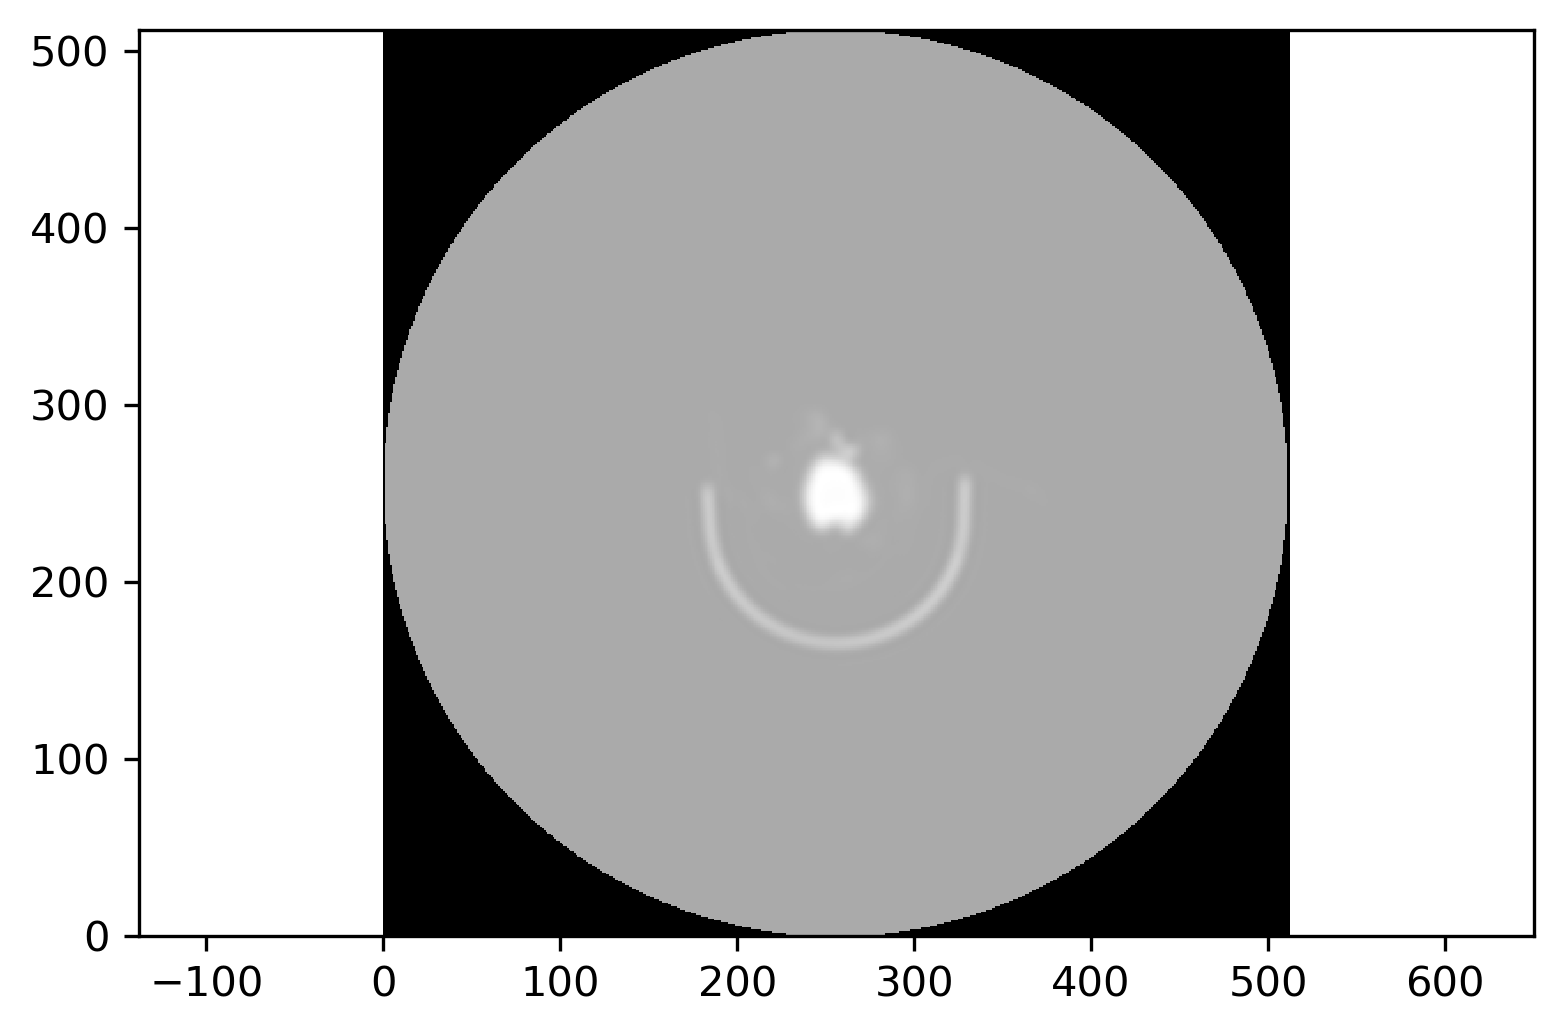

In [62]:
# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'4', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'6'}

pyplot.figure(figsize=(1, 1), dpi=300)

s = 1 # series (directory) number

# Copy the frames for this series:
frames = dicomDict[dictKeys[s]]['frames']

print('There are {} frames in series "{}"'.format(len(frames), dictKeys[s]))
print('The modality is {}'.format(frames[0].Modality))

f = 1 # frame number within series

frame = dicomDict[dictKeys[s]]['frames'][f]
    
pyplot.figure(dpi=300);
pyplot.axes().set_aspect('equal', 'datalim');
pyplot.set_cmap(pyplot.gray());
#pyplot.pcolormesh(someData.pixel_array);
pyplot.pcolormesh(np.fliplr(np.flipud(frame.pixel_array)));

There are 47 frames in PT series "series-000003"


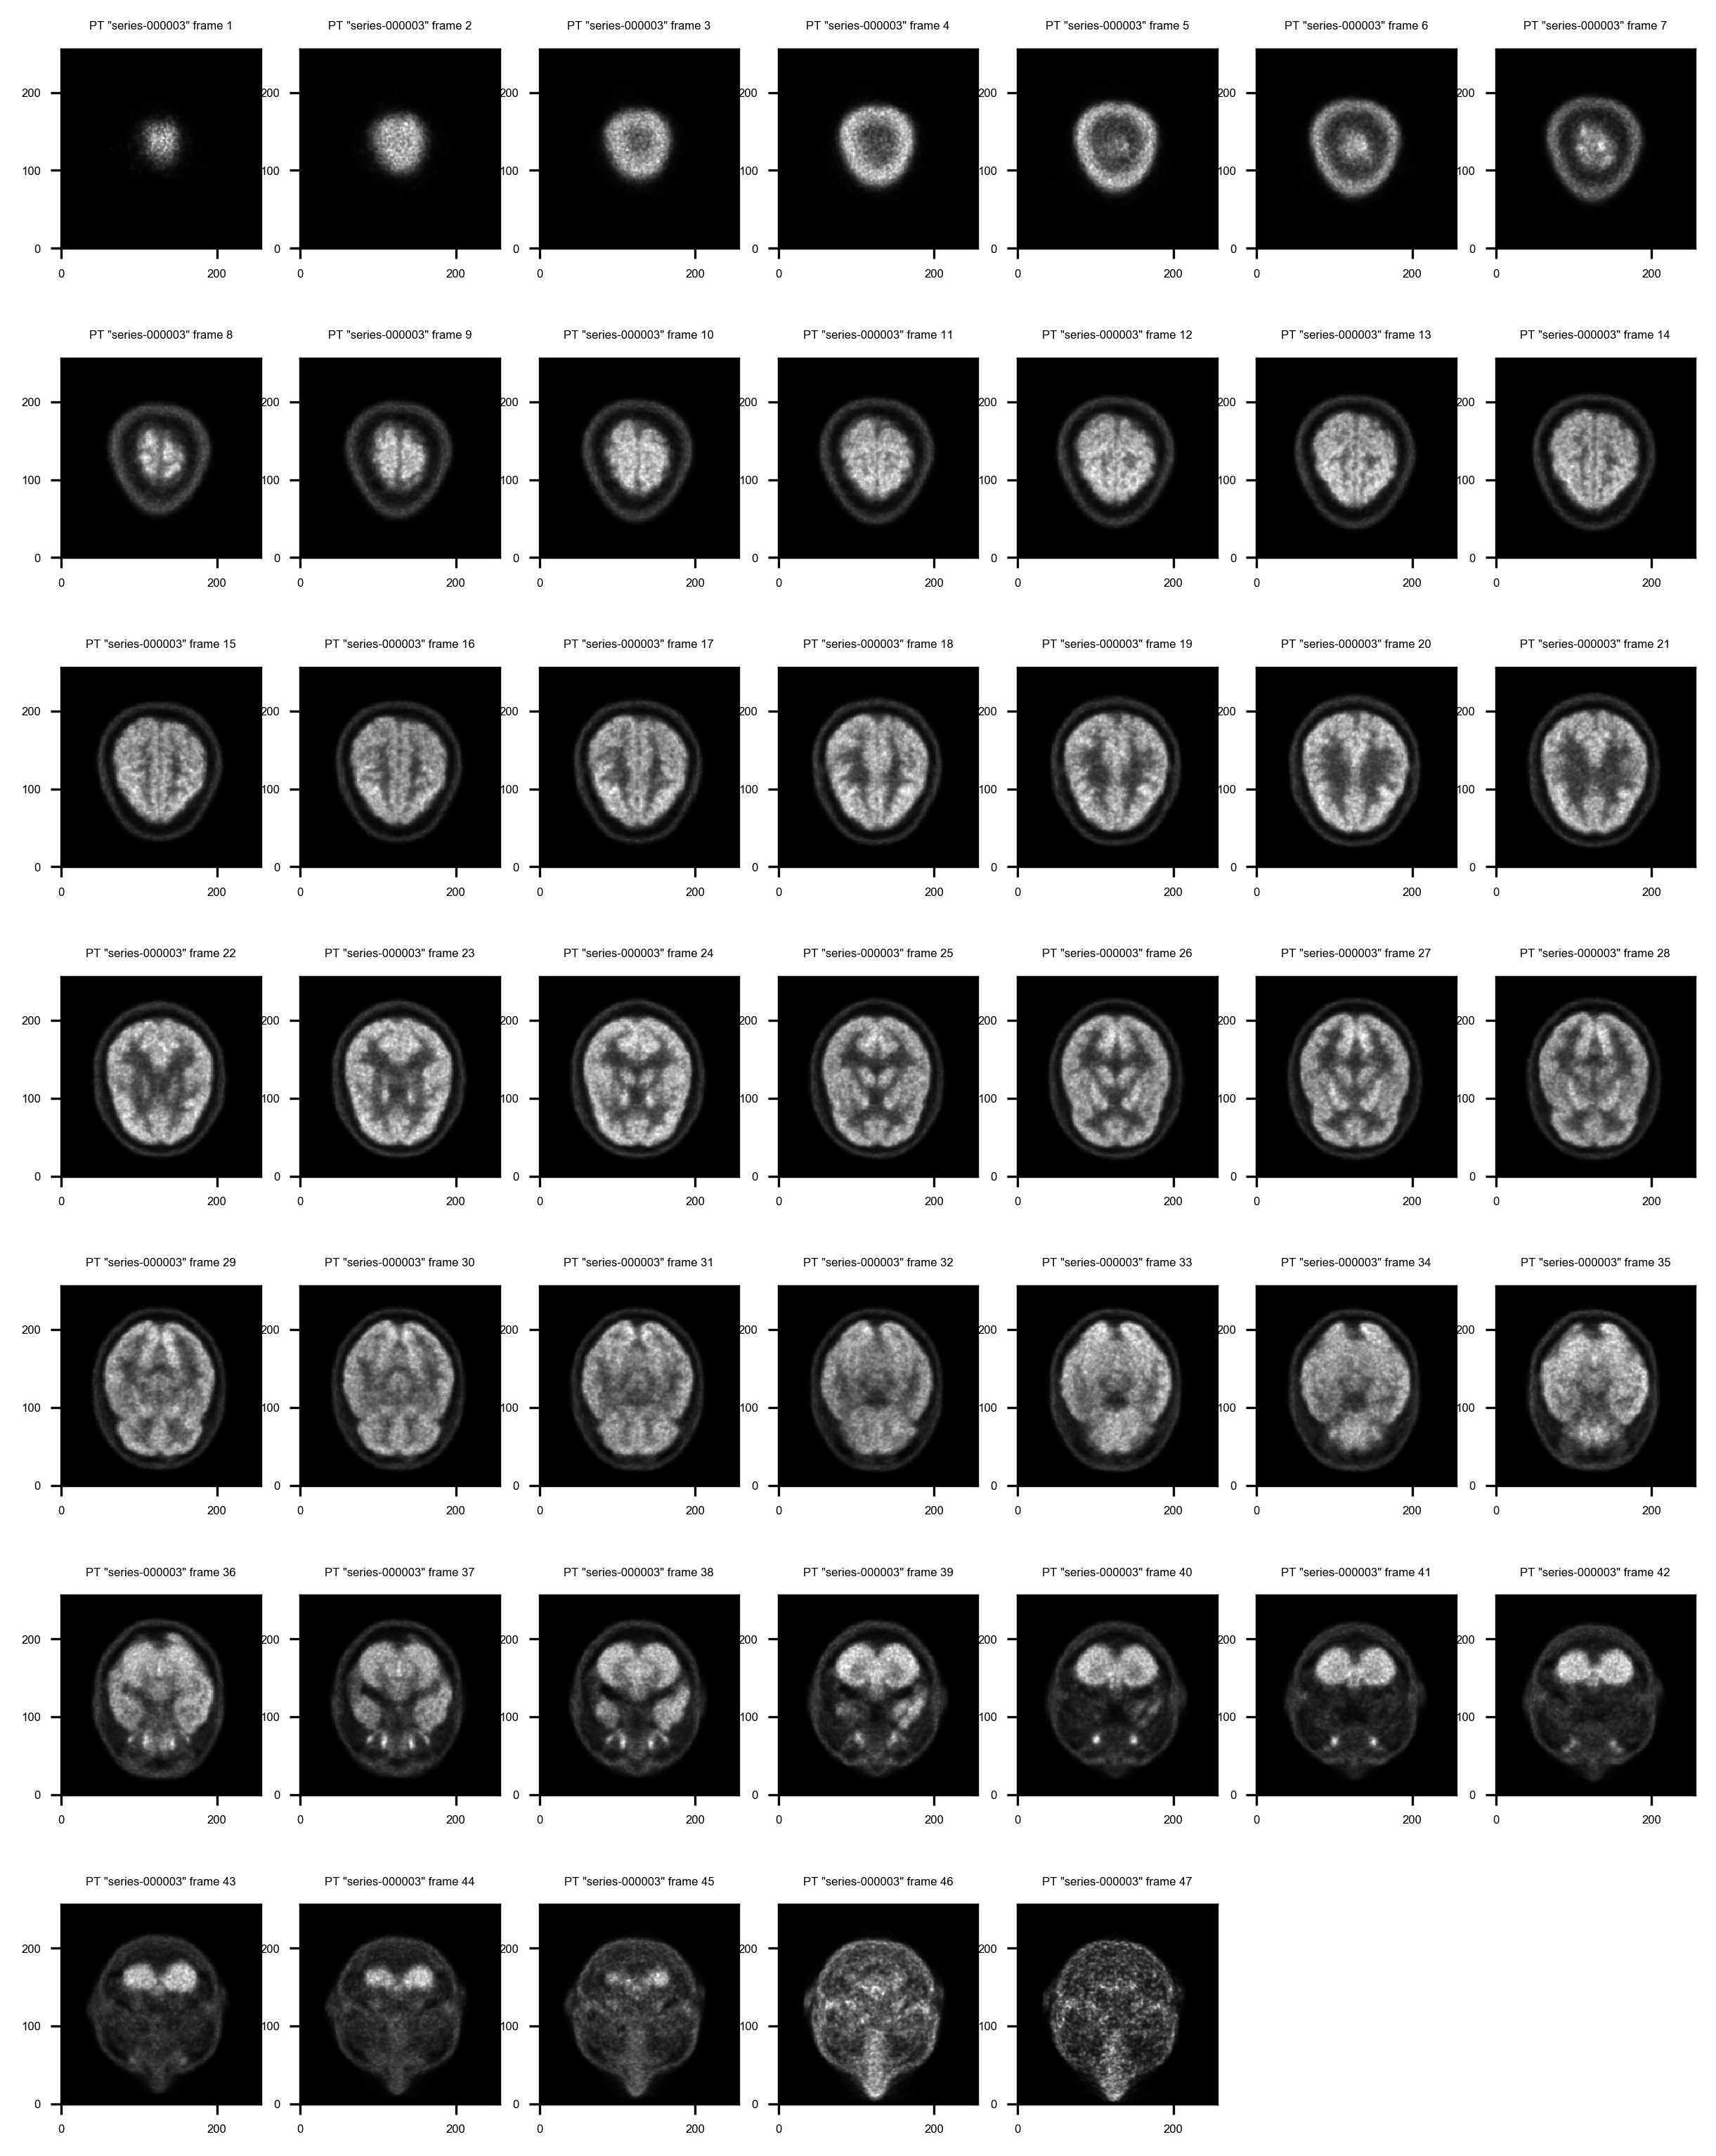

In [90]:
s = 3 # series (directory) number

# Copy the frames for this series:
frames = dicomDict[dictKeys[s]]['frames']

#dimZ = frames.shape[2]
dimZ = len(frames)

seriesName = dictKeys[s]
seriesModality = frames[0].Modality

print('There are {} frames in {} series "{}"'.format(dimZ, seriesModality, seriesName))

# Configure plot:
# Set the font dictionaries (for plot title and axis titles):
title_font = {'fontname':'Arial', 'size':'4', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'6'}
# Set the number of subplot columns:
#cols = 5
#cols = 4
#cols = 3
#cols = 7
cols = np.int8(np.round(np.sqrt(dimZ)))

#pyplot.figure(figsize=(5, 50), dpi=300);
#pyplot.figure(figsize=(5, 70), dpi=300);
#pyplot.figure(figsize=(5, 90), dpi=300);
#pyplot.figure(figsize=(7, 50), dpi=300);
#pyplot.figure(figsize=(10, 70), dpi=300);
#pyplot.figure(figsize=(10, 10*cols), dpi=300);
#pyplot.figure(figsize=(2*cols, 10*cols), dpi=300);
pyplot.figure(figsize=(10, 13*cols), dpi=300);

i = 0 # for subplot pos

for f in range(dimZ):
    #print('Working on frame', str(f+1), 'of', str(dimZ), '...')
    
    # This frame:
    frame = frames[f].pixel_array
        
    # Plot:
    i = i + 1    
    ax = pyplot.subplot(dimZ,cols,i, aspect='equal')
    #pyplot.pcolormesh(x, y, frame);
    pyplot.pcolormesh(frame);
    #pyplot.title('frame ' + str(f+1), **title_font)
    pyplot.title('{} "{}" frame {}'.format(seriesModality, seriesName, f+1), **title_font)

    # Set the tick labels font
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontname('Arial')
        label.set_fontsize(4)
        
#plt.savefig('{} {} - all frames.jpg'.format(seriesModality, seriesName), bbox_inches='tight')

In [80]:
np.int8(np.round(np.sqrt(47)))

7

# Convert to grayscale. 
img1 = cv2.cvtColor(img1_colour, cv2.COLOR_BGR2GRAY) 
img2 = cv2.cvtColor(img2_colour, cv2.COLOR_BGR2GRAY) 
height, width = img2.shape 

print(np.max(img1), np.max(img2))

#cv2.imshow('Reference image (img2)', img2)
#cv2.waitKey(0) # waits until a key is pressed
#cv2.destroyAllWindows() # destroys the window showing image

plt.title('Reference image (img2)')
plt.imshow(img2, cmap='gray')

# This just hides x and y tick values by passing in 
# empty lists to make the output a little cleaner 
plt.xticks([]), plt.yticks([]) 
plt.show()

In [91]:
# Create ORB detector with 5000 features. 
orb_detector = cv2.ORB_create(5000) 

In [101]:
# See what happens if the images are the same:
f1 = 25
f2 = 25
img1 = frames[f1].pixel_array
img2 = frames[f2].pixel_array

# Convert to OpenCV image:
img1 = cv2.resize(img1, img1.shape)
img2 = cv2.resize(img2, img2.shape)

#img1 = np.double(img1)
#img1 = np.int8(img1)

# cv2.resize(img_np,(200,200))

# Find keypoints and descriptors. 
# The first arg is the image, second arg is the mask 
#  (which is not reqiured in this case). 
kp1, d1 = orb_detector.detectAndCompute(img1, None) 
kp2, d2 = orb_detector.detectAndCompute(img2, None) 
  
# Match features between the two images. 
# We create a Brute Force matcher with  
# Hamming distance as measurement mode. 
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True) 
  
# Match the two sets of descriptors. 
matches = matcher.match(d1, d2) 
  
# Sort matches on the basis of their Hamming distance. 
matches.sort(key = lambda x: x.distance) 
  
# Take the top 90 % matches forward. 
matches = matches[:int(len(matches)*90)] 
no_of_matches = len(matches) 
  
# Define empty matrices of shape no_of_matches * 2. 
p1 = np.zeros((no_of_matches, 2)) 
p2 = np.zeros((no_of_matches, 2)) 
  
for i in range(len(matches)): 
    p1[i, :] = kp1[matches[i].queryIdx].pt 
    p2[i, :] = kp2[matches[i].trainIdx].pt 

# Find the homography matrix. 
homography, mask = cv2.findHomography(p1, p2, cv2.RANSAC) 
  
# Use this matrix to transform the 
# colored image wrt the reference image. 
transformed_img = cv2.warpPerspective(img1_color, 
                    homography, (width, height)) 
  
# Save the output. 
#cv2.imwrite('output.jpg', transformed_img) 

# Set the number of subplot columns:
cols = 3

pyplot.figure(figsize=(5, 5), dpi=300);
      
# Plot img1:   
ax = pyplot.subplot(1,cols,1, aspect='equal')
#pyplot.pcolormesh(x, y, frame);
pyplot.pcolormesh(img1);
#pyplot.title('frame ' + str(f+1), **title_font)
pyplot.title('{} "{}" frame {}'.format(seriesModality, seriesName, f1), **title_font)

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(4)
    
# Plot img2:   
ax = pyplot.subplot(1,cols,2, aspect='equal')
#pyplot.pcolormesh(x, y, frame);
pyplot.pcolormesh(img2);
#pyplot.title('frame ' + str(f+1), **title_font)
pyplot.title('{} "{}" frame {}'.format(seriesModality, seriesName, f2), **title_font)

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(4)
        
# Plot the transformed image:   
ax = pyplot.subplot(1,cols,3, aspect='equal')
#pyplot.pcolormesh(x, y, frame);
pyplot.pcolormesh(transformed_img);
#pyplot.title('frame ' + str(f+1), **title_font)
pyplot.title('{} "{}" transformed image'.format(seriesModality, seriesName), **title_font)

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(4)
#plt.savefig('{} {} - all frames.jpg'.format(seriesModality, seriesName), bbox_inches='tight')

error: OpenCV(4.1.2) c:\projects\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0xe227985e::Set<1,-1,-1>,struct cv::impl::A0xe227985e::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [105]:
img1.shape

(256, 256)

In [107]:
img1 = cv2.resize(img1, img1.shape)
img1.channels()

AttributeError: 'numpy.ndarray' object has no attribute 'channels'

In [104]:
# Try BGR2GRAY:

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY) 
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY) 

error: OpenCV(4.1.2) c:\projects\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0xe227985e::Set<1,-1,-1>,struct cv::impl::A0xe227985e::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [103]:
img1.dtype

dtype('int16')

In [99]:
img1.dtype

dtype('int8')

In [108]:
dicomDict[dictKeys[s]]['frames'][0].dtype

AttributeError: 'FileDataset' object has no attribute 'dtype'

In [111]:
dicomDict[dictKeys[s]]['frames'][0].pixel_array.dtype

dtype('int16')

In [115]:
cv2.imshow('sample image dicom', dicomDict[dictKeys[s]]['frames'][f1].pixel_array)

cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows() # destroys the window showing image

error: OpenCV(4.1.2) C:\projects\opencv-python\opencv\modules\calib3d\src\ptsetreg.cpp:174: error: (-215:Assertion failed) count >= 0 && count2 == count in function 'cv::RANSACPointSetRegistrator::run'


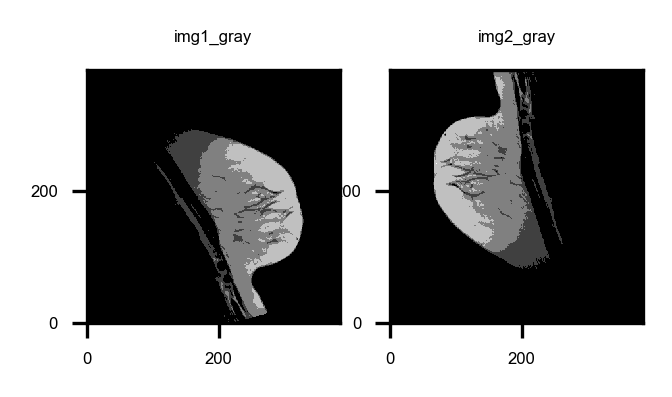

In [138]:
# Open the image files. 

#dataDir = r'C:\DICOM_data\Select NCITA coding task images'
rootDir = r'C:\Users\ctorti\Documents\GitHub\WP1.3_multiple_modalities'

img1_name = 'slice_12_rot15deg_flipLR_flipUD.tif'
img2_name = 'slice_12.tif'

# Read in the images:
img1_colour = cv2.imread(os.path.join(rootDir, img1_name))  # Image to be aligned. 
img2_colour = cv2.imread(os.path.join(rootDir, img2_name))  # Reference image. 

# Convert to grayscale:
img1_gray = cv2.cvtColor(img1_colour, cv2.COLOR_BGR2GRAY) 
img2_gray = cv2.cvtColor(img2_colour, cv2.COLOR_BGR2GRAY) 

# Set the number of subplot columns:
cols = 4

pyplot.figure(figsize=(5, 5), dpi=300);
      
        
# Plot img1_gray:   
ax = pyplot.subplot(1,cols,1, aspect='equal')
#pyplot.pcolormesh(x, y, frame);
pyplot.pcolormesh(img1_gray);
#pyplot.title('frame ' + str(f+1), **title_font)
pyplot.title('img1_gray', **title_font)

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(4)
    
# Plot img2_gray:   
ax = pyplot.subplot(1,cols,2, aspect='equal')
#pyplot.pcolormesh(x, y, frame);
pyplot.pcolormesh(img2_gray);
#pyplot.title('frame ' + str(f+1), **title_font)
pyplot.title('img2_gray', **title_font)

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(4)

#plt.savefig('{} {} - all frames.jpg'.format(seriesModality, seriesName), bbox_inches='tight')


# Create ORB detector with 5000 features. 
#orb_detector = cv2.ORB_create(5000) 
orb_detector = cv2.ORB_create() 

# Find keypoints and descriptors. 
# The first arg is the image, second arg is the mask 
#  (which is not reqiured in this case). 
keyPoints1, descriptors1 = orb_detector.detectAndCompute(img1_gray, None) 
keyPoints2, descriptors2 = orb_detector.detectAndCompute(img2_gray, None) 
  
# Match features between the two images. 
# We create a Brute Force matcher with  
# Hamming distance as measurement mode. 
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True) 
  
# Match the two sets of descriptors. 
matches = matcher.match(descriptors1, descriptors2) 
  
# Sort matches on the basis of their Hamming distance. 
matches.sort(key = lambda x: x.distance) 
  
# Take the top 90 % matches forward. 
matches = matches[:int(len(matches)*90)] 
no_of_matches = len(matches) 
  
# Define empty matrices of shape no_of_matches * 2. 
p1 = np.zeros((no_of_matches, 2)) 
p2 = np.zeros((no_of_matches, 2)) 
  
for i in range(len(matches)): 
    p1[i, :] = kp1[matches[i].queryIdx].pt 
    p2[i, :] = kp2[matches[i].trainIdx].pt 

# Find the homography matrix. 
homography, mask = cv2.findHomography(p1, p2, cv2.RANSAC) 
  
# Use this matrix to transform the 
# colored image wrt the reference image. 
transformed_img = cv2.warpPerspective(img1_color, 
                    homography, (width, height)) 

In [134]:
print(np.shape(img1_colour))
print(np.shape(img1_gray))
print(np.max(img1_colour))
print(np.max(img2_colour))
print(np.max(img1_gray))
print(np.max(img2_gray))

(384, 384, 3)
(384, 384)
4
4
4
4


In [122]:

print(np.max(img1_colour))
print(np.max(img2_colour))d2